In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv("world_population_worldbank.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1960          264 non-null    float64
 3   1961          264 non-null    float64
 4   1962          264 non-null    float64
 5   1963          264 non-null    float64
 6   1964          264 non-null    float64
 7   1965          264 non-null    float64
 8   1966          264 non-null    float64
 9   1967          264 non-null    float64
 10  1968          264 non-null    float64
 11  1969          264 non-null    float64
 12  1970          264 non-null    float64
 13  1971          264 non-null    float64
 14  1972          264 non-null    float64
 15  1973          264 non-null    float64
 16  1974          264 non-null    float64
 17  1975          264 non-null    float64
 18  1976          264 non-null    

In [6]:
print(df.shape)

(266, 66)


In [7]:
print(df.isnull().sum())

Country Name    0
Country Code    0
1960            2
1961            2
1962            2
               ..
2019            1
2020            1
2021            1
2022            1
2023            1
Length: 66, dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(264, 66)

In [10]:
print(df.describe())

               1960          1961          1962          1963          1964  \
count  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02   
mean   1.157939e+08  1.173869e+08  1.195401e+08  1.222050e+08  1.248922e+08   
std    3.639920e+08  3.684672e+08  3.751049e+08  3.837174e+08  3.923714e+08   
min    2.646000e+03  2.888000e+03  3.171000e+03  3.481000e+03  3.811000e+03   
25%    5.132212e+05  5.231345e+05  5.337595e+05  5.449288e+05  5.566630e+05   
50%    3.708088e+06  3.816540e+06  3.931214e+06  4.033994e+06  4.112910e+06   
75%    2.670606e+07  2.748694e+07  2.830289e+07  2.914708e+07  3.001684e+07   
max    3.031517e+09  3.072470e+09  3.126894e+09  3.193470e+09  3.260480e+09   

               1965          1966          1967          1968          1969  \
count  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02   
mean   1.276182e+08  1.304676e+08  1.333152e+08  1.362430e+08  1.392759e+08   
std    4.011556e+08  4.104328e+08  4.196670e+08  4.

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
# Load a list of official country codes (ISO 3166)
official_countries = set(pd.read_csv("https://raw.githubusercontent.com/datasets/country-codes/main/data/country-codes.csv")["ISO3166-1-Alpha-3"].dropna())

# Filter only actual countries based on Country Code
df_filtered = df[df["Country Code"].isin(official_countries)]

In [13]:
# Find the latest available year (last column after 'Country Name' & 'Country Code')
latest_year = df_filtered.columns[-1]
print(f"Latest Year in Dataset: {latest_year}")

Latest Year in Dataset: 2023


In [14]:
# Select only 'Country Name' and the latest year
top_countries = df_filtered[["Country Name", latest_year]].sort_values(by=latest_year, ascending=False).head(10)

# Display the top 10 countries
print(top_countries)

           Country Name          2023
109               India  1.428628e+09
40                China  1.410710e+09
251       United States  3.349149e+08
106           Indonesia  2.775341e+08
184            Pakistan  2.404857e+08
174             Nigeria  2.238046e+08
29               Brazil  2.164224e+08
20           Bangladesh  1.729543e+08
202  Russian Federation  1.438261e+08
154              Mexico  1.284556e+08


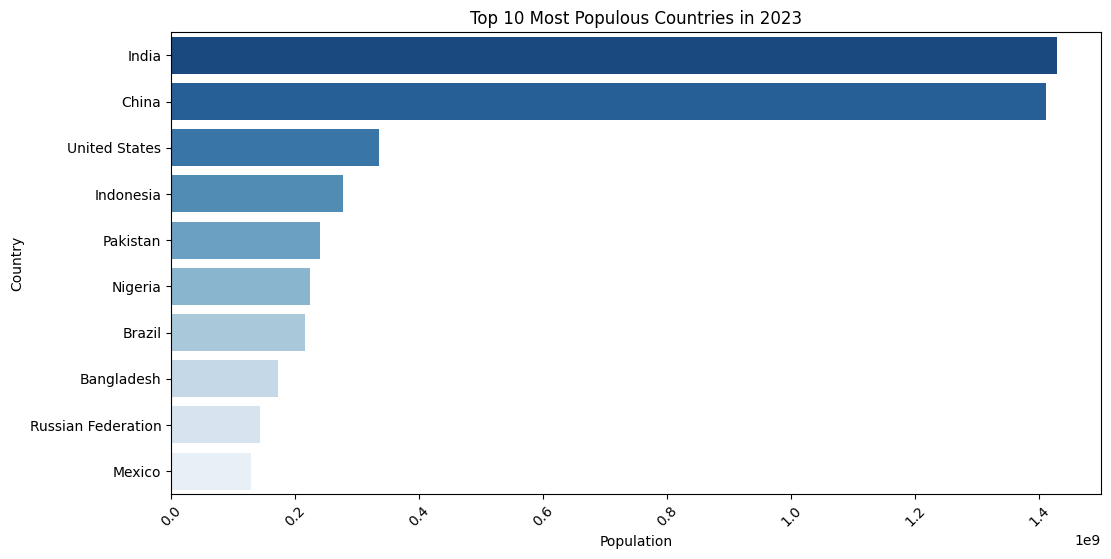

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x=latest_year, y="Country Name", palette="Blues_r")

plt.title(f"Top 10 Most Populous Countries in {latest_year}")
plt.xlabel("Population")
plt.ylabel("Country")
plt.xticks(rotation=45)

plt.show()

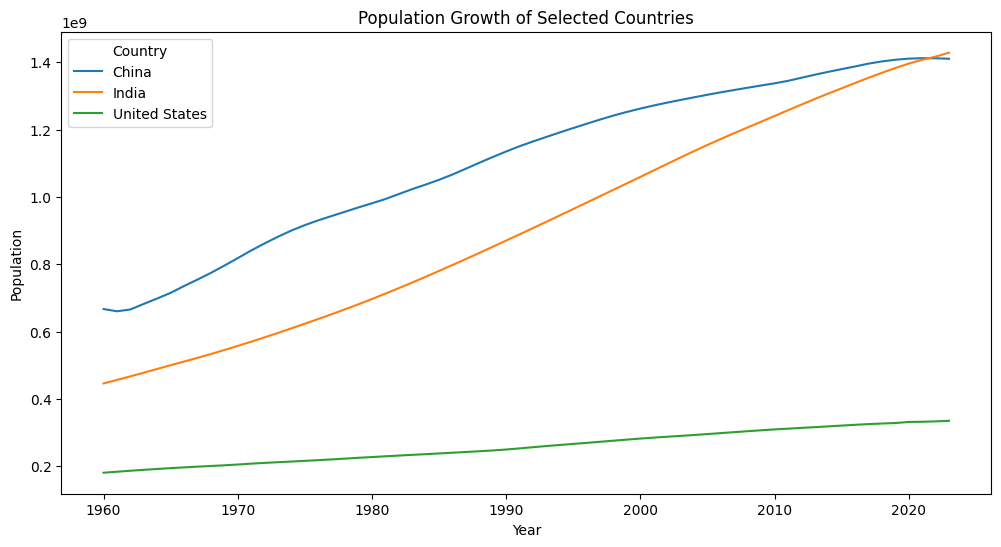

<Figure size 640x480 with 0 Axes>

In [16]:
# Melt the dataset for analysis
df_melted = df.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Population")
df_melted["Year"] = df_melted["Year"].astype(int)

# Population growth comparison for selected countries
selected_countries = ["India", "China", "United States"]
df_selected = df_melted[df_melted["Country Name"].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x="Year", y="Population", hue="Country Name")
plt.title("Population Growth of Selected Countries")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Country")
plt.show()

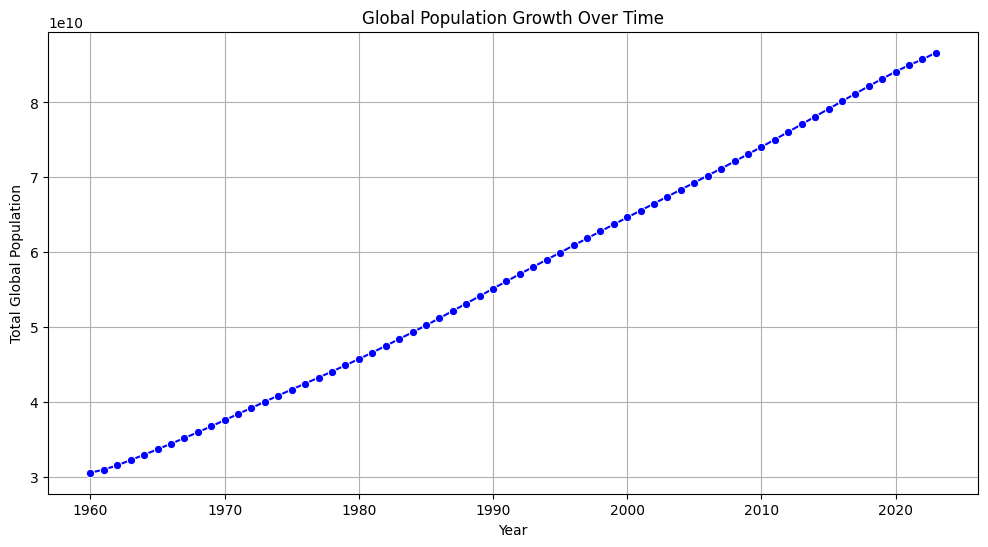

In [17]:
# Compute global population by summing across all countries
global_population = df_melted.groupby("Year")["Population"].sum().reset_index()

# Plot global population growth
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_population, x="Year", y="Population", marker="o", color="b")
plt.title("Global Population Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Total Global Population")
plt.grid(True)
plt.show()

In [19]:
small_states = df[df["Country Name"] == "Small states"]
print(small_states)

     Country Name Country Code       1960       1961       1962       1963  \
218  Small states          SST  8070458.0  8225676.0  8401577.0  8580103.0   

          1964       1965       1966       1967  ...        2014        2015  \
218  8757487.0  8930497.0  9095506.0  9251753.0  ...  18251250.0  18483937.0   

           2016        2017        2018        2019        2020        2021  \
218  18709361.0  18940564.0  19177011.0  19377482.0  19526038.0  19674424.0   

           2022        2023  
218  19881389.0  20086203.0  

[1 rows x 66 columns]


In [20]:
income_groups = df[df["Country Name"].isin(["Low income", "Middle income", "High income"])]
print(income_groups)

      Country Name Country Code          1960          1961          1962  \
95     High income          HIC  9.079124e+08  9.191075e+08  9.305367e+08   
136     Low income          LIC  1.357626e+08  1.389343e+08  1.422329e+08   
156  Middle income          MIC  1.979685e+09  2.005975e+09  2.045371e+09   

             1963          1964          1965          1966          1967  \
95   9.418799e+08  9.532157e+08  9.642617e+08  9.741575e+08  9.836900e+08   
136  1.456600e+08  1.492609e+08  1.530260e+08  1.569038e+08  1.609787e+08   
156  2.096870e+09  2.148632e+09  2.201267e+09  2.257438e+09  2.313388e+09   

     ...          2014          2015          2016          2017  \
95   ...  1.357162e+09  1.364282e+09  1.371516e+09  1.377929e+09   
136  ...  5.677023e+08  5.821730e+08  5.976835e+08  6.139469e+08   
156  ...  5.362247e+09  5.427266e+09  5.491015e+09  5.554671e+09   

             2018          2019          2020          2021          2022  \
95   1.383955e+09  1.389172e+09 

In [21]:
regions = df[df["Country Name"].isin(["Sub-Saharan Africa", "South Asia", "Latin America & Caribbean"])]
print(regions)

                  Country Name Country Code         1960         1961  \
134  Latin America & Caribbean          LCN  219142626.0  225304612.0   
204                 South Asia          SAS  571192428.0  584794755.0   
217         Sub-Saharan Africa          SSF  227948869.0  233483265.0   

            1962         1963         1964         1965         1966  \
134  231638540.0  238127927.0  244742056.0  251458185.0  258225265.0   
204  598784274.0  613149540.0  627867470.0  642649029.0  657382046.0   
217  239280622.0  245298063.0  251565974.0  258078554.0  264754002.0   

            1967  ...          2014          2015          2016          2017  \
134  265030167.0  ...  6.150468e+08  6.213901e+08  6.276675e+08  6.337952e+08   
204  672401853.0  ...  1.754030e+09  1.775545e+09  1.797073e+09  1.818932e+09   
217  271633185.0  ...  9.815066e+08  1.008699e+09  1.036156e+09  1.063885e+09   

             2018          2019          2020          2021          2022  \
134  6.396263e+0

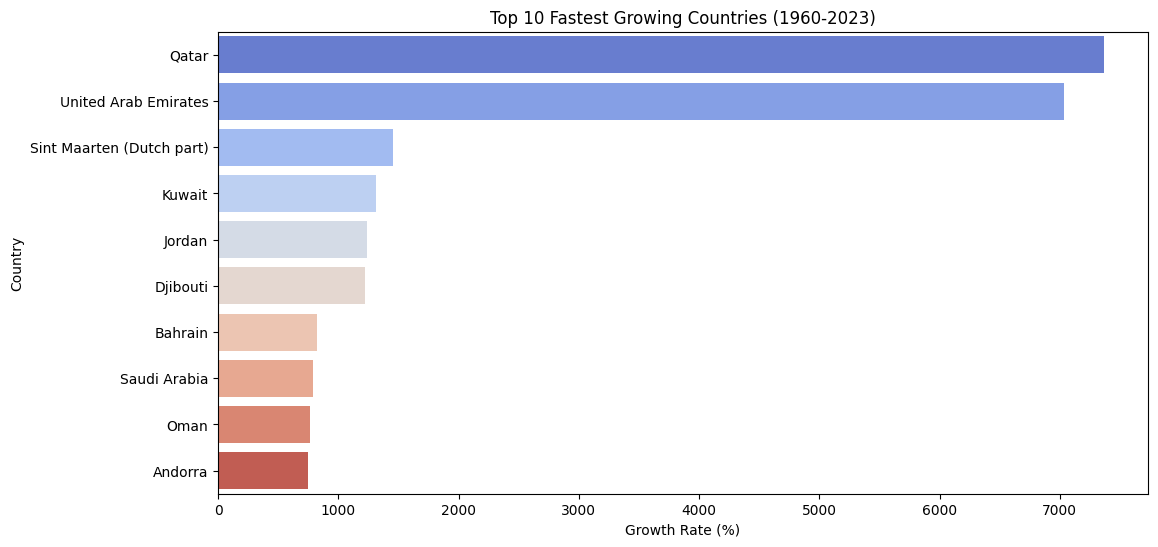

In [23]:
# Compute population growth rate
df['Growth Rate'] = ((df['2023'] - df['1960']) / df['1960']) * 100
fastest_growing = df[['Country Name', 'Growth Rate']].nlargest(10, 'Growth Rate')

# Plot fastest-growing countries
plt.figure(figsize=(12, 6))
sns.barplot(x='Growth Rate', y='Country Name', data=fastest_growing, palette='coolwarm')
plt.xlabel("Growth Rate (%)")
plt.ylabel("Country")
plt.title("Top 10 Fastest Growing Countries (1960-2023)")
plt.show()

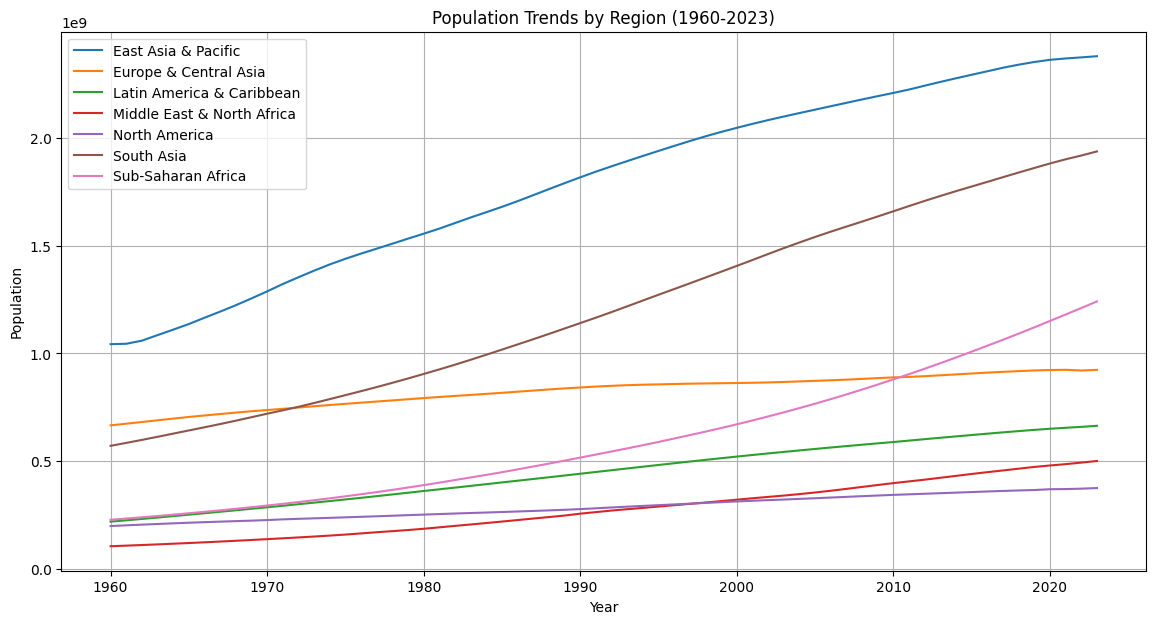

In [24]:
regions = ["East Asia & Pacific", "Europe & Central Asia", "Latin America & Caribbean",
           "Middle East & North Africa", "North America", "South Asia", "Sub-Saharan Africa"]

# Ensure we only select years (1960-2023) from the dataset
years = [str(year) for year in range(1960, 2024)]

# Filter only the regional data and extract year columns
regional_trends = df[df["Country Name"].isin(regions)][["Country Name"] + years]

# Set "Country Name" as the index before transposing
regional_trends.set_index("Country Name", inplace=True)

# Transpose so that years become the index
regional_trends = regional_trends.T

# Convert index to integer years for proper plotting
regional_trends.index = regional_trends.index.astype(int)

# Plot the trends
plt.figure(figsize=(14, 7))
for region in regions:
    if region in regional_trends.columns:  # Ensure region exists
        plt.plot(regional_trends.index, regional_trends[region], label=region)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Trends by Region (1960-2023)")
plt.legend()
plt.grid()
plt.show()

In [25]:
### **4. Country with Highest and Lowest Population Growth**
highest_growth_country = df.loc[df['Growth Rate'].idxmax(), ['Country Name', 'Growth Rate']]
lowest_growth_country = df.loc[df['Growth Rate'].idxmin(), ['Country Name', 'Growth Rate']]

print(f"🚀 Country with the highest growth: {highest_growth_country['Country Name']} ({highest_growth_country['Growth Rate']:.2f}%)")
print(f"📉 Country with the lowest growth: {lowest_growth_country['Country Name']} ({lowest_growth_country['Growth Rate']:.2f}%)")

🚀 Country with the highest growth: Qatar (7365.69%)
📉 Country with the lowest growth: Bulgaria (-18.27%)


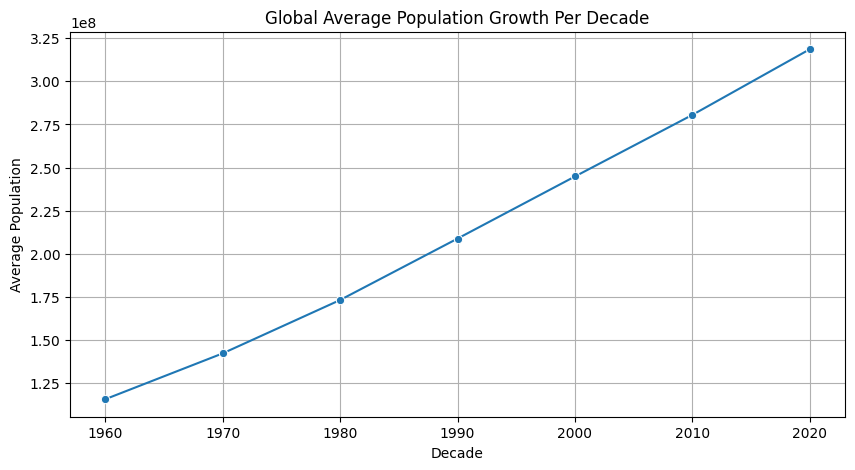

In [26]:
decades = [str(year) for year in range(1960, 2024, 10)]
global_avg_growth = df[decades].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=global_avg_growth.index, y=global_avg_growth.values, marker='o', linestyle='-')
plt.xlabel("Decade")
plt.ylabel("Average Population")
plt.title("Global Average Population Growth Per Decade")
plt.grid()
plt.show()

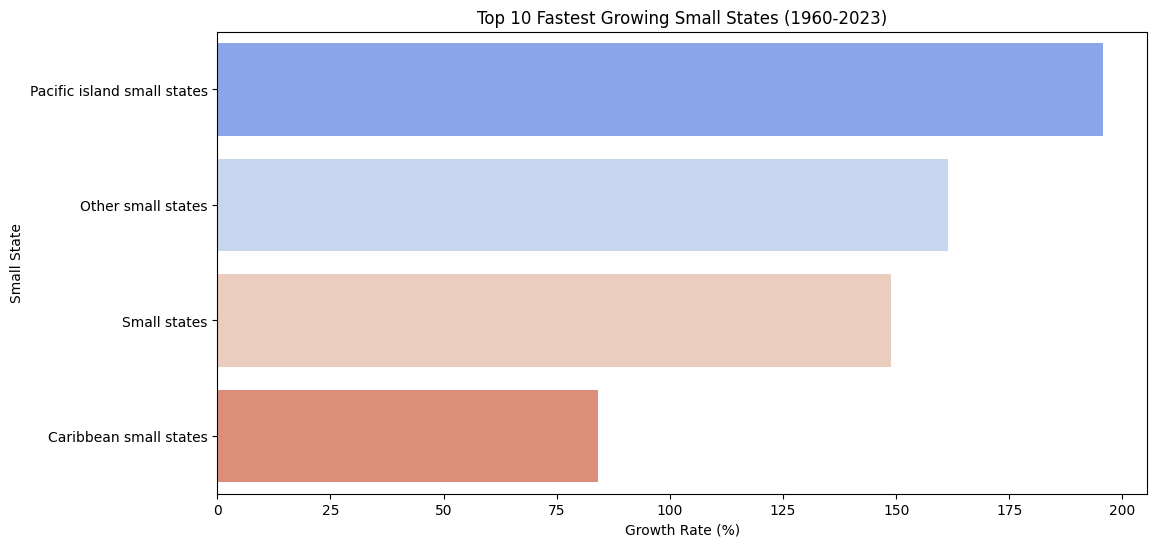

In [28]:
# Compute growth rate for Small States
df["Growth Rate"] = ((df["2023"] - df["1960"]) / df["1960"]) * 100

# Get the top 10 fastest-growing small states
fastest_growing_small_states = df[df["Country Name"].str.contains("Small states", case=False, na=False)]
fastest_growing_small_states = fastest_growing_small_states.nlargest(10, "Growth Rate")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Growth Rate", y="Country Name", data=fastest_growing_small_states, palette="coolwarm")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Small State")
plt.title("Top 10 Fastest Growing Small States (1960-2023)")
plt.show()

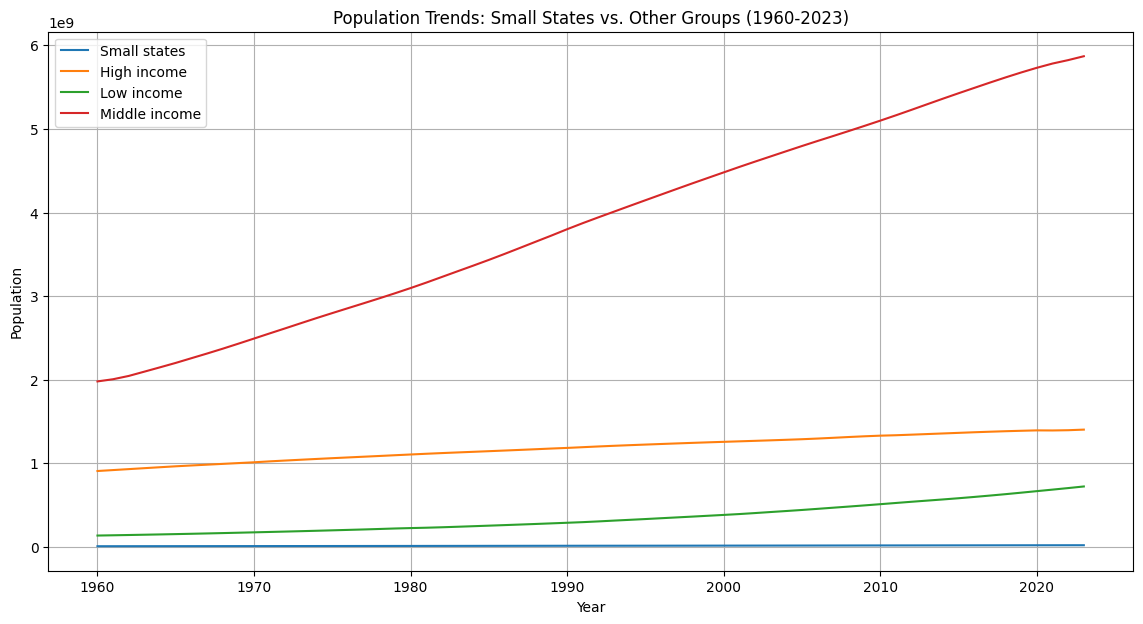

In [29]:
# Select groups to compare
groups = ["Small states", "High income", "Low income", "Middle income"]

# Extract population trends
group_trends = df[df["Country Name"].isin(groups)][["Country Name"] + years].set_index("Country Name").T
group_trends.index = group_trends.index.astype(int)

# Plot comparison
plt.figure(figsize=(14, 7))
for group in groups:
    plt.plot(group_trends.index, group_trends[group], label=group)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Trends: Small States vs. Other Groups (1960-2023)")
plt.legend()
plt.grid()
plt.show()

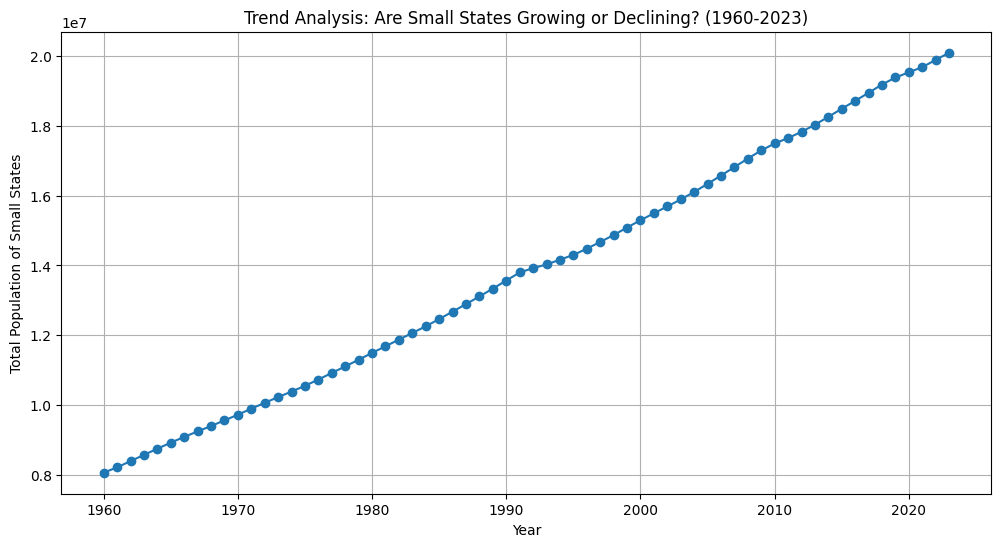

In [30]:
# Compute total population growth for small states
small_states_growth = small_states[years].sum()

# Plot growth trend
plt.figure(figsize=(12, 6))
plt.plot(small_states_growth.index.astype(int), small_states_growth.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Total Population of Small States")
plt.title("Trend Analysis: Are Small States Growing or Declining? (1960-2023)")
plt.grid()
plt.show()

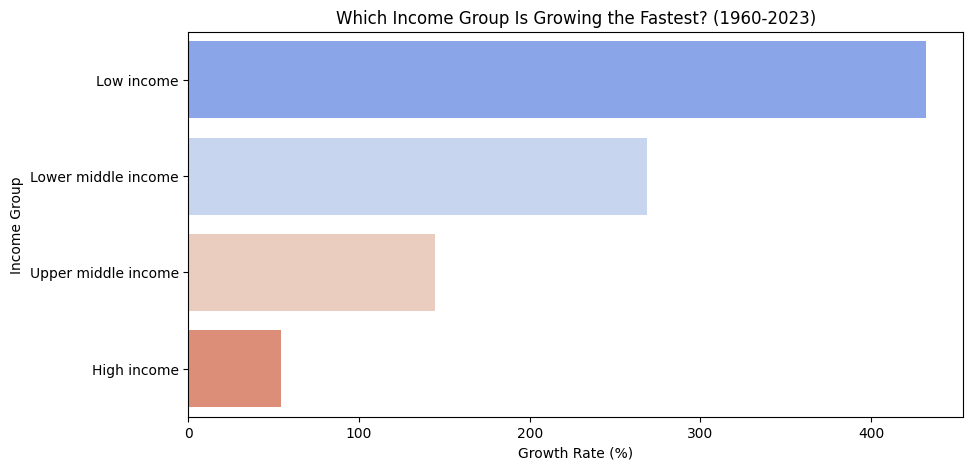

In [31]:
# Filter income groups
income_groups = ["High income", "Upper middle income", "Lower middle income", "Low income"]
income_df = df[df["Country Name"].isin(income_groups)].copy()

# Compute growth rate
income_df["Growth Rate"] = ((income_df["2023"] - income_df["1960"]) / income_df["1960"]) * 100

# Sort to find the fastest-growing income group
fastest_growing_income = income_df[["Country Name", "Growth Rate"]].sort_values(by="Growth Rate", ascending=False)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x="Growth Rate", y="Country Name", data=fastest_growing_income, palette="coolwarm")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Income Group")
plt.title("Which Income Group Is Growing the Fastest? (1960-2023)")
plt.show()

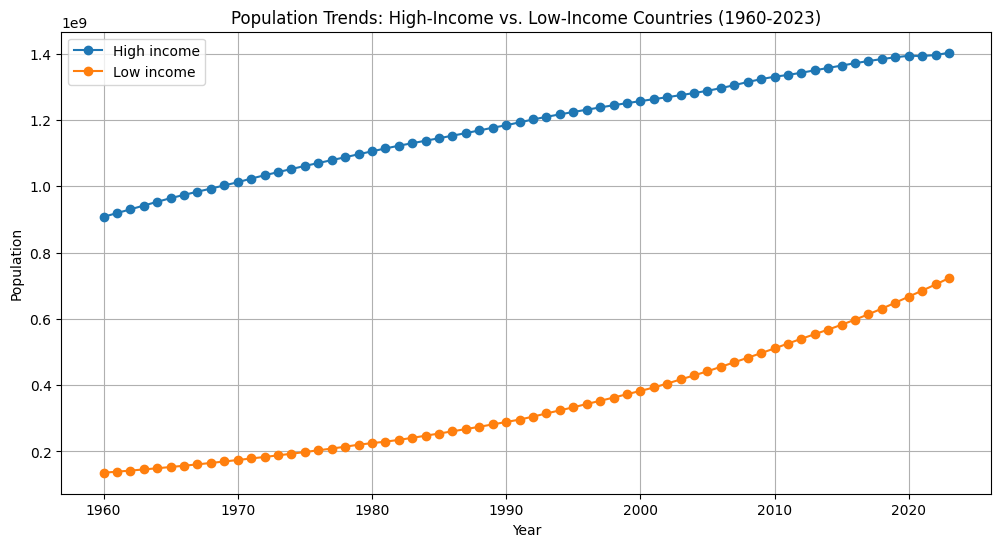

In [32]:
# Extract population trends
income_trends = df[df["Country Name"].isin(["High income", "Low income"])][["Country Name"] + years].set_index("Country Name").T
income_trends.index = income_trends.index.astype(int)

# Plot trends
plt.figure(figsize=(12, 6))
for income in ["High income", "Low income"]:
    plt.plot(income_trends.index, income_trends[income], marker="o", linestyle="-", label=income)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Trends: High-Income vs. Low-Income Countries (1960-2023)")
plt.legend()
plt.grid()
plt.show()

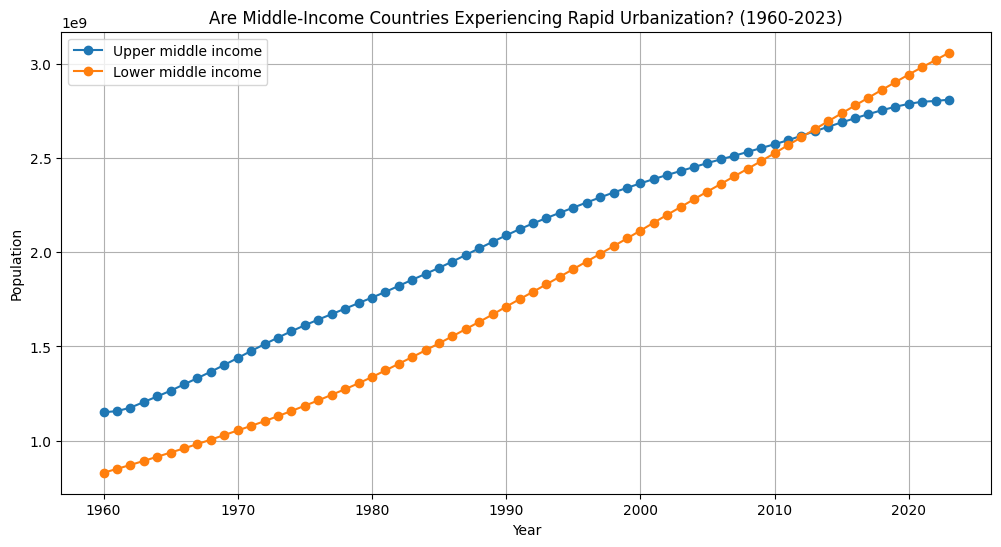

In [33]:
# Select middle-income groups
middle_income_groups = ["Upper middle income", "Lower middle income"]

# Extract trends
middle_income_trends = df[df["Country Name"].isin(middle_income_groups)][["Country Name"] + years].set_index("Country Name").T
middle_income_trends.index = middle_income_trends.index.astype(int)

# Plot trends
plt.figure(figsize=(12, 6))
for group in middle_income_groups:
    plt.plot(middle_income_trends.index, middle_income_trends[group], marker="o", linestyle="-", label=group)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Are Middle-Income Countries Experiencing Rapid Urbanization? (1960-2023)")
plt.legend()
plt.grid()
plt.show()